### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 24th at 11.59pm CDT
---

The first two homework problems this week are very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

In [1]:
# IMPORTS
##########
##########

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

## Solution 1

1. From the lecture notebook 21: 

    $$o_{k} = g(\sum \limits_{j=1} ^M w_{jk}a_{j} + b_{k})$$

    As we only have one hidden layer that functions using a linear activation of the form $f(x) = x$, this collapses down quite a lot. The sum disappears, $a_{jk} = x$ with $x$ being the input data, and there is only one weight and bias which can be reperstented by $w$ and $b$ respectively. Putting this all together:

    $$o = w*x + b$$

    Based on the above equation, I would not expect my model to learn any nonlinearities as it would just be fitting a straight line. This is further supported by the discussion on hidden layers in Lecture notebook 21. 

    To me, it seems as if my guess was right running the network on the spiral data. The network seems to just be picking up on a straight line through the middle and not getting the curvature that seperates the two sets of data at all. This is seen on all of the provided sets of data as well.

SRT: Not quite. In addition to the synapse weights connecting input to the hidden layer, there is also a weight in the synapse connecting the single-neuron hidden layer to the output. -1

2. With these changes I think my model is learning nonlinearites. At the very least, it is picking up on some curved boundaries across many different data sets. It seems to be doing the best on the corner data set and rightly putting a boundary around at least one of the corners. I would not say that this leads to a very effective model however, as it is still wrongly classifying 1/4 of the data.

3. The addition of the thrid hidden neuron actually helps a lot. Most of the time the model is accurately modeling that the two diagonal corners that are connected. It still isn't perfect. On some runs, instead of the sort of bow towards the center you see on the better models, it just creates a stripe down the center or still only identifys one corner. The test loss ranges from a little less than .2 to as much as 0.34, so varies quite a bit from run to run.

4. After playing around for a bit, I couldn't find a model that reliably had a test loss of .177 or lower. My best model, using a learning rate of 0.03, ReLU activation, a regularization rate of 0.01, and 3 hidden layers all with 5 neurons, could consistently reach a test loss of around 0.182, sometimes hitting the asked for test loss. 

5. That model architecture convereges at about the same rate as my model above, but with slightly less accuracy. This architecture also occasinally takes longer to converge to a good model. From playing around in question 4, I know that the addition of layers and neurons definitely has an optimum size. At a certain point, if you make the model too fine, the fit begins to take longer to converge and the models tend to be worse. My guess as to the reason this is, at the point this behavior begins happening, the model is overfitting the data.

SRT: Excellent, good commentary.

## Problem 2


[This](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.01&noise=50&networkShape=3,2&seed=0.65406&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature combinations may be hard to construct.

1. Train the best model you can, using just X1 and X2. Add or remove layers and neurons as you see fit, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?


2. Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

## Solution 2

1. With a learning rate of 0.01, a regularization of 0.03, ReLU activiation, 3 hidden layers of sizes 5, 4, 4, and a batch size of 13 (although batch size did not seem to affect much) the best consistent learning rate I could achieve hovered around 0.480. To me, the model output surface looks pretty smooth. At least, there doesn't seem to be any huge deviations in the gradient color in the background and changes from orange to blue smoothly.

2. By adding in the features $X_{1}X_{2}$ and $sin(X_{1})$, I was able to get a consistently better model, with a test loss closer to 0.473. The model itself does look smoother as well, but perhaps not a significant amount. The line between the two colors is a little less harsh and has more flexibility to it almost, catpuring the more curved nature of the data.

    Adding all three additionally properties definitely lead to the worst model. Additionally, not including $X_{1}X_{2}$ and either one of both of the $sin()$ was not a great option either. 

SRT: I think your learning rate was too low here, and regularization too severe. With 3 hidden layers, 8 neurons each, and letting it run for at least 1000 epochs, I can get down into 0.2-0.3 test loss. My guess is that in your experiments you didn't let it run for long enough; it can look converged and then suddenly give a big drop in loss. -2

## Problem 3

The first few steps of this problem are the same as last week's homework.


**1. Use the following code snippet to read in SDSS galaxy color data.**
```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```
**Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class.**


**2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.**


**3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).**


**4. Scale your training and testing data to prepare it for the DNN.** 


**5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data.**


**6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:**

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

**Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.**


**7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!**

## Solution 3

In [2]:
#CLD fetching the sdss data
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()

In [3]:
#CLD creating an index array for every 10th row
#CLD assuming starting at 0, then 10 etc
index = np.arange(0,len(data),10)
sliced_data = data[index]

In [4]:
#CLD creating the color arrays and the redshift/specclass arrays
u_g = sliced_data['u'] - sliced_data['g']
g_r = sliced_data['g'] - sliced_data['r']
r_i = sliced_data['r'] - sliced_data['i']
i_z = sliced_data['i'] - sliced_data['z']

redshift = sliced_data['redshift']
specclass = sliced_data['specClass']

#CLD creating an int array for specclass so easier to plot
labels = np.zeros(len(specclass))
labels[specclass=='GALAXY'] = 0
labels[specclass=='QSO'] = 1

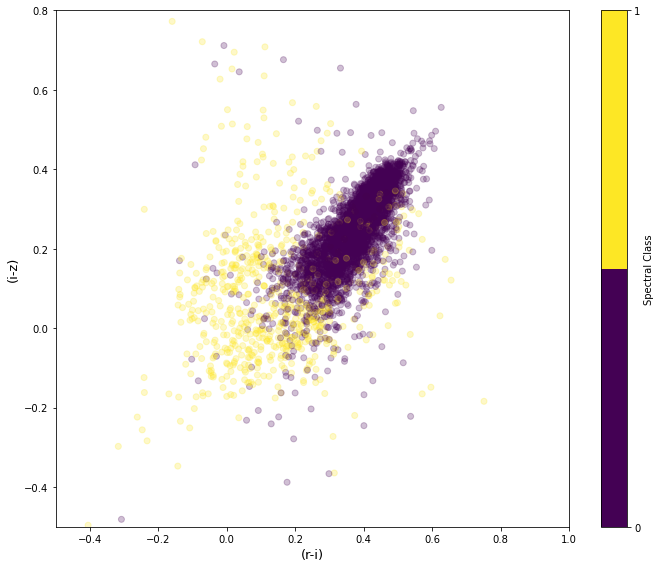

In [5]:
#CLD plotting the data
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(r_i, i_z, c=labels, alpha=0.25)
ax.set_xlabel('(r-i)',fontsize=13)
ax.set_ylabel('(i-z)',fontsize=13)
ax.set_xlim(-0.5,1)
ax.set_ylim(-0.5,0.8)
fig.tight_layout()
fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('viridis', 2)),label='Spectral Class', ticks=range(2))
plt.show(fig)

In [6]:
#CLD stacking into X
X = np.array([r_i, i_z]).T

In [7]:
#CLD target label array has already been created
#CLD splitting into train and test data
place = train_test_split(X, labels, test_size=0.2, random_state=42)

#CLD creating the train and test arrays
train_X = place[0]
test_X = place[1]

train_labels = place[2]
test_labels = place[3]

In [8]:
#CLD scaling the data in preperation for the DNN
scaled_train_X = preprocessing.scale(train_X)
scaled_test_X = preprocessing.scale(test_X)

In [9]:
#CLD setting up the DNN with the given parameters
#CLD solver=sgd is setting the solver to stochastic gradient descent
mlp = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', solver='sgd', max_iter=1000, random_state=42)

#CLD training the model
mlp.fit(scaled_train_X, train_labels)

#CLD predicting the labels of the test labels
pred_labels = mlp.predict_proba(scaled_test_X)[:,1] #CLD again assuming we are doing this off of qso as they are 
#CLD still =1

fpr, tpr, thresh = roc_curve(test_labels, pred_labels)
fpr = np.concatenate([[0], fpr]) #CLD adding (0,0) as first point
tpr = np.concatenate([[0], tpr])

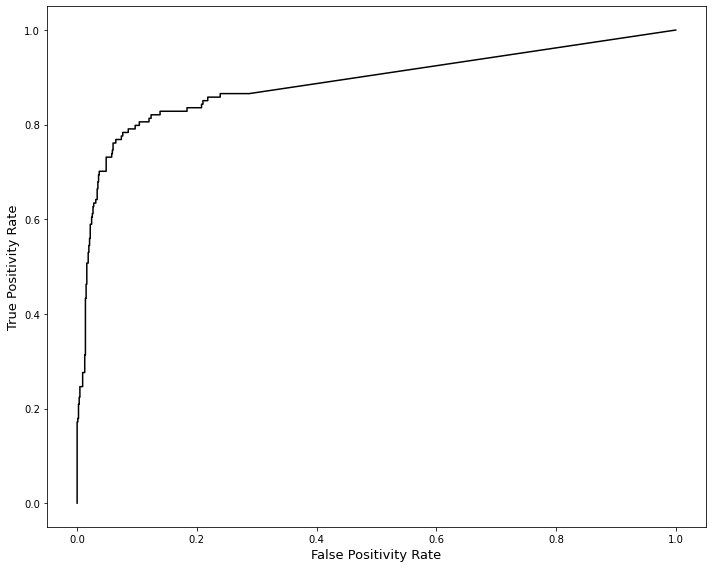

In [10]:
#CLD plotting the ROC curve
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(fpr,tpr,c='k')
ax.set_xlabel('False Positivity Rate', fontsize=13)
ax.set_ylabel('True Positivity Rate', fontsize=13)
fig.tight_layout()
plt.show(fig)

SRT: Excellent.

In [11]:
#CLD setting up the hyper param array
hyperparams = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

In [12]:
#CLD setting up the gridsearch of the params on the DNN
grid = GridSearchCV(MLPClassifier(), hyperparams, n_jobs=-1)

#CLD doing the gridsearch
grid.fit(scaled_train_X, train_labels) #CLD pass it scaled data as its using a DNN?

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(2, 2), (5, 5), (5, 2),
                                                (5, 5, 5)],
                         'max_iter': [1000], 'random_state': [42],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [13]:
print(grid.best_params_)
print(grid.best_score_) #CLD I think this is what he's asking for...

{'activation': 'relu', 'hidden_layer_sizes': (5, 5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}
0.9342499999999999


SRT: Looks good.

In [14]:
#CLD setting up a new model with the best fit params from above
mlp2 = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='adam', max_iter=1000, random_state=42)

#CLD training the model
mlp2.fit(scaled_train_X, train_labels)

#CLD getting the predicted probas for this model
pred_labels2 = mlp2.predict_proba(scaled_test_X)[:,1]

#CLD getting the fpr, tpr to make the ROC curve for this model
fpr2, tpr2, thresh = roc_curve(test_labels, pred_labels2)

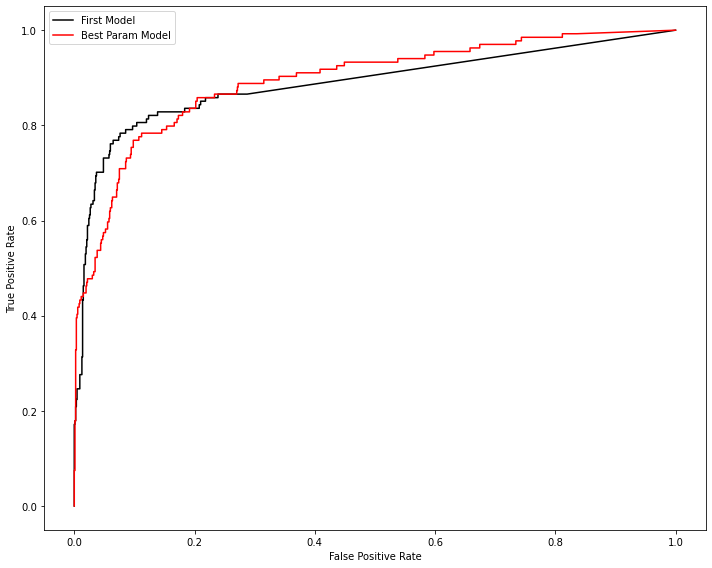

In [15]:
#CLD plotting the two ROC curves for the seperate models
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(fpr,tpr,c='k',label='First Model')
ax.plot(fpr2,tpr2,c='r',label='Best Param Model')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
fig.tight_layout()
plt.show(fig)

SRT: Great work, Carrie!